In [2]:
import pylab as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd

In [3]:
data = pd.read_csv('HATS_global_F11.dat', sep=r"\s*", parse_dates=[['HATS_F11_YYYY', 'HATS_F11_MM']])
data.index=data['HATS_F11_YYYY_HATS_F11_MM']

/Users/ptg21/anaconda/envs/basemap/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [20]:
def CFCModel(y, t):
    bank = y[4]
    # add an extra source term between tstart and tend
    if t>5*yr and t<15*yr:
        dy0 = bank - k1*y[0]
    else:
        dy0 = - k1*y[0]
    if t>5*yr and t<10*yr:
        dy1 = bank - k1*y[1]
    else:
        dy1 = - k1*y[1]
        
    if t>10*yr and t<15*yr:
        dy2 = bank - k1*y[2]
    else:
        dy2 = - k1*y[2]
    dy3 = -k1*y[3]
    return dy0, dy1, dy2, dy3,0.

In [21]:
nyrs = 60.
extrastart = 15.
extraend = 25.

# FIX ME!!
RMMCFC11=137.37 # g per mol
yr=365.*24.*3600.
k1 = 1./(55.*yr)

# conversion factors
Ggperyearinpptv = 1e6/5e18 *(28.8/RMMCFC11) *1e12/ yr #  Gg per year -> molecules per second

# time array for solution 
time = np.linspace(start=0.0, stop=nyrs*yr, num=nyrs)

In [22]:
# null case
init = 262.5 # pptv
bank = 30. 
yinit = np.array([init, init, init, init, bank*Ggperyearinpptv])
y0 =  odeint(CFCModel, yinit,  time)

# create timeseries for plotting with correct date time indices
times = pd.date_range(start='1/1/1999', periods=nyrs, freq='A')

A=pd.Series(data=y0[:,0]-y0[:,3], index=times)
B=pd.Series(data=y0[:,1]-y0[:,3], index=times)
C=pd.Series(data=y0[:,2]-y0[:,3], index=times)

D = B+C

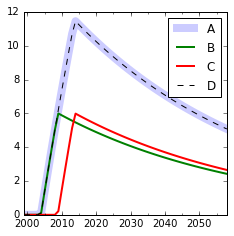

In [28]:
# plot the datax
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
A.plot(lw=8, alpha=0.2, label='A')
B.plot(lw=2, label='B')
C.plot(lw=2, label='C')
D.plot(lw=1,style='--', color='black',label='D')
plt.legend()
#plt.ylim([140,40])


# plt.subplot(2,2,4)
# data['HATS_Global_F11'].plot(lw=5, alpha=0.4)
# plt.ylim([140,300])
#plt.xlim(0,5)
plt.show()